## Observations and Insights 

In [10]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_study_df = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="outer")

# Display the data table for preview
mouse_study_df.head(10)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [11]:
# Checking the number of mice.
mouse_number = len(mouse_study_df["Mouse ID"].unique())
mouse_number

249

In [12]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

#all instances of duplicated data will be True in new Dupes column
mouse_study_df['Duplicate'] = mouse_study_df.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False) 

#return Mouse ID for any row that is true, store in variable dupe_mouse
dupe_mouse_series = mouse_study_df.loc[mouse_study_df["Duplicate"] == True, "Mouse ID"]
dupe_mouse_array = dupe_mouse_series.unique() #returns an array
dupe_mouse = dupe_mouse_array[0]

In [13]:
# Optional: Get all the data for the duplicate mouse ID. 
dupe_data = mouse_study_df.loc[mouse_study_df['Mouse ID'] == dupe_mouse, :].copy()

In [14]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_study_nodupes_df = mouse_study_df.loc[mouse_study_df['Mouse ID'] != dupe_mouse, :].copy()

In [15]:
# Checking the number of mice in the clean DataFrame.
mouse2_number = len(mouse_study_nodupes_df["Mouse ID"].unique())
mouse2_number

248

## Summary Statistics

In [35]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

regimen_summary_group = mouse_study_nodupes_df.groupby(["Drug Regimen"])

tumor_mean = regimen_summary_group["Tumor Volume (mm3)"].mean()
tumor_median = regimen_summary_group["Tumor Volume (mm3)"].median()
tumor_std = regimen_summary_group["Tumor Volume (mm3)"].std()
tumor_var = regimen_summary_group["Tumor Volume (mm3)"].var()
tumor_sem = regimen_summary_group["Tumor Volume (mm3)"].sem()

regimen_summary_longway = pd.DataFrame(
    {"Mean Tumor Volume (mm3)": tumor_mean,
     "Median Tumor Volume (mm3)": tumor_median, 
     "Standard Deviation": tumor_std, 
     "Variation": tumor_var, 
     "SEM": tumor_sem   
    }
)

regimen_summary_longway

,Mean Tumor Volume (mm3),Median Tumor Volume (mm3),Standard Deviation,Variation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,4.994774,24.947764,0.329346
Ceftamin,52.591172,51.776157,6.268188,39.290177,0.469821
Infubinol,52.884795,51.820584,6.567243,43.128684,0.492236
Ketapril,55.235638,53.698743,8.279709,68.553577,0.603860
Naftisol,54.331565,52.509285,8.134708,66.173479,0.596466
Placebo,54.033581,52.288934,7.821003,61.168083,0.581331
Propriva,52.320930,50.446266,6.622085,43.852013,0.544332
Ramicane,40.216745,40.673236,4.846308,23.486704,0.320955
Stelasyn,54.233149,52.431737,7.710419,59.450562,0.573111


In [36]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
regimen_summary_agg = mouse_study_nodupes_df.groupby(["Drug Regimen"]).agg(
    {"Tumor Volume (mm3)": ["mean", 'median', 'std', 'var', 'sem']}
                            )
regimen_summary_agg  

Tumor Volume (mm3)                                          
                           mean     median       std        var       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  4.994774  24.947764  0.329346
Ceftamin              52.591172  51.776157  6.268188  39.290177  0.469821
Infubinol             52.884795  51.820584  6.567243  43.128684  0.492236
Ketapril              55.235638  53.698743  8.279709  68.553577  0.603860
Naftisol              54.331565  52.509285  8.134708  66.173479  0.596466
Placebo               54.033581  52.288934  7.821003  61.168083  0.581331
Propriva              52.320930  50.446266  6.622085  43.852013  0.544332
Ramicane              40.216745  40.673236  4.846308  23.486704  0.320955
Stelasyn              54.233149  52.431737  7.710419  59.450562  0.573111
Zoniferol             53.236507  51.818479  6.966589  48.533355  0.516398

## Bar and Pie Charts

<AxesSubplot:title={'center':'Number of timepoints per drug regimen'}, xlabel='Drug Regimen', ylabel='Number'>

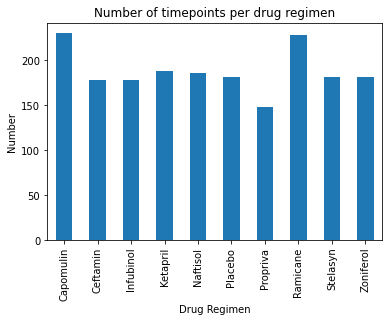

In [50]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
timepoint = regimen_summary_group["Tumor Volume (mm3)"].count()
timepoint.plot(kind = "bar", title="Number of timepoints per drug regimen", ylabel="Number")

Text(0.5, 1.0, 'Number of timepoints per drug regimen')

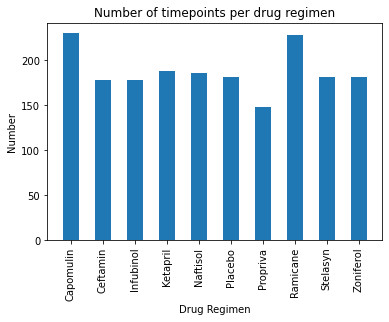

In [48]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
plt.bar(timepoint.index,timepoint, width = 0.5)
plt.xlabel("Drug Regimen")
plt.xticks(rotation="vertical")
plt.ylabel("Number")
plt.title("Number of timepoints per drug regimen")

<AxesSubplot:ylabel='Sex'>

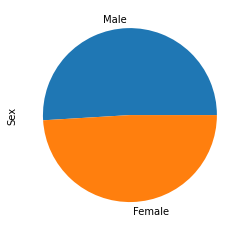

In [61]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mouse_sex=mouse_study_nodupes_df["Sex"].value_counts()

mouse_sex.plot(kind="pie")


([<matplotlib.patches.Wedge at 0x204d6d6a910>,
 [Text(-0.03308201408261547, 1.0995024239828841, 'Male'),
  Text(0.033082014082615095, -1.0995024239828841, 'Female')])

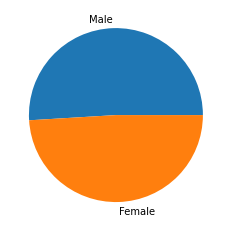

In [60]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(mouse_sex, labels=["Male", "Female"])


## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
